In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#for inline plots
%matplotlib inline

In [ ]:
#load the csv files
matches = pd.read_csv('/matches.csv')
deliveries = pd.read_csv('/deliveries.csv')

In [ ]:
#display first few rows
matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
#structure of the matches dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#structure of deliveries dataset
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
#missing values in matches
matches.isnull().sum()

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [ ]:
#missing values in deliveries
deliveries.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [ ]:
#drop
matches.drop(columns=['umpire3'], inplace=True)

In [ ]:
#total matches and seasons
print("Total number of matches: ", matches.shape[0])
print("Total number of seasons: ", matches['season'].nunique())

Total number of matches:  756
Total number of seasons:  12


/tmp/ipython-input-12-3875465975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=matches, palette='Set2')


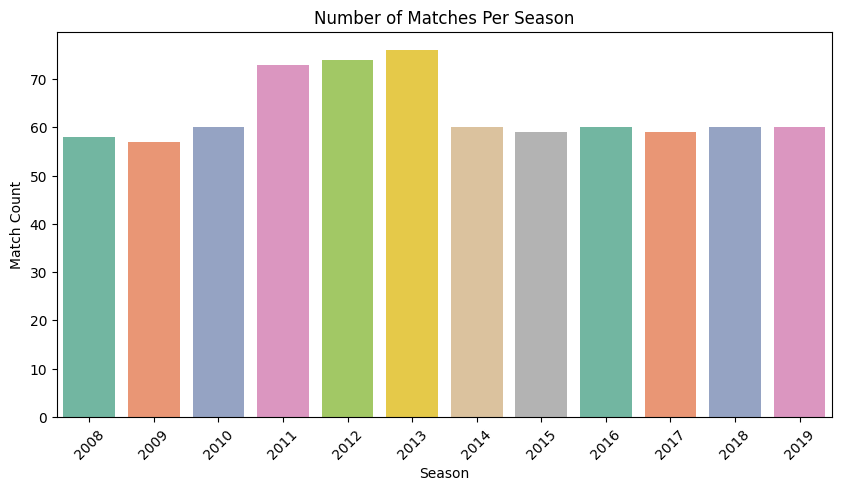

In [ ]:
#matches per season with slot
plt.figure(figsize=(10,5))
sns.countplot(x='season', data=matches, palette='Set2')
plt.title("Number of Matches Per Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#load the dataset
df = pd.read_csv('/matches.csv')

In [ ]:
#drop any rows which has no result
df = df.dropna(subset=['winner'])

In [ ]:
#count wins
wins = df['winner'].value_counts()

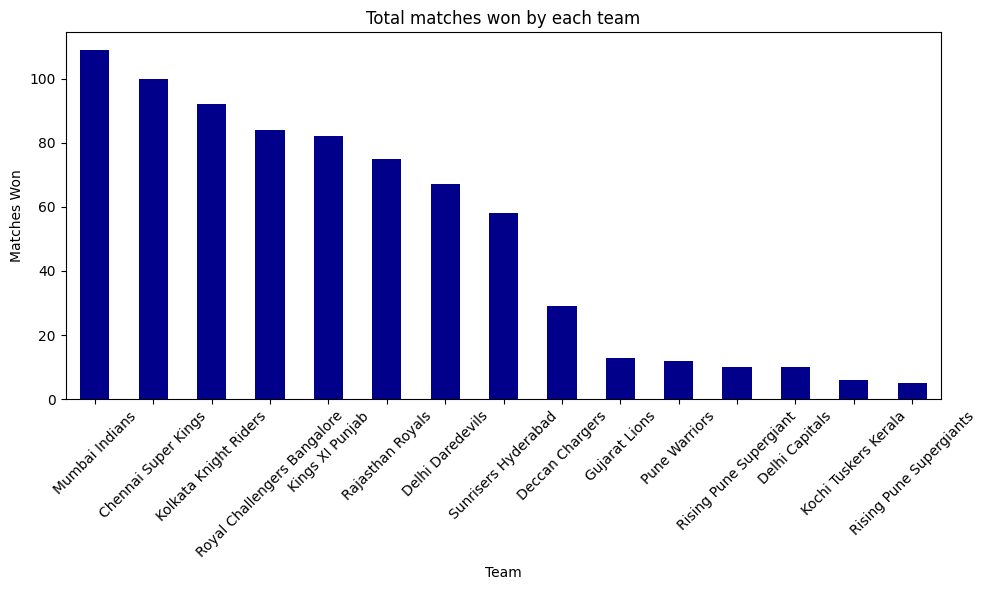

In [ ]:
#plotting
plt.figure(figsize=(10,6))
wins.plot(kind='bar', color='darkblue')
plt.title('Total matches won by each team')
plt.xlabel('Team')
plt.ylabel('Matches Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#total matches with result
total_matches = df[df['winner'].notna()].shape[0]

In [ ]:
#matches where toss winner also won the match
toss_win_match_win = df[df['toss_winner'] == df['winner']].shape[0]

In [ ]:
#percentage
percentage = (toss_win_match_win/total_matches) * 100

print(f"Toss winner also won the match in {toss_win_match_win} matches.")
print(f"That's about {percentage: .2f}% of all the matches.")


Toss winner also won the match in 393 matches.
That's about  52.26% of all the matches.


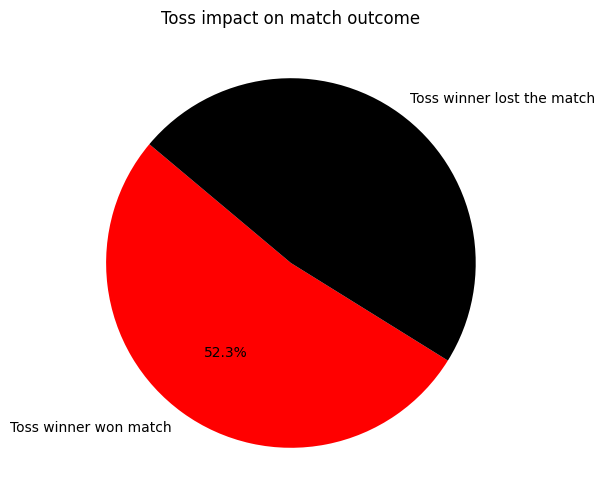

In [ ]:
lables = ['Toss winner won match', 'Toss winner lost the match']
values = [toss_win_match_win, total_matches-toss_win_match_win]

plt.figure(figsize=(6,6))
plt.pie(values, labels=lables, autopct='%1.1f%%', colors=['red','black'], startangle=140)
plt.title('Toss impact on match outcome')
plt.show()

In [ ]:
#group by season and winner and count wins
season_team_wins = df.groupby(['season', 'winner']).size().reset_index(name='wins')


In [ ]:
#for each season, find the team with max wins
top_teams = season_team_wins.loc[season_team_wins.groupby('season')['wins'].idxmax()]

print(top_teams)

    season                 winner  wins
6     2008       Rajasthan Royals    13
10    2009       Delhi Daredevils    10
21    2010         Mumbai Indians    11
24    2011    Chennai Super Kings    11
38    2012  Kolkata Knight Riders    12
47    2013         Mumbai Indians    13
54    2014        Kings XI Punjab    12
60    2015    Chennai Super Kings    10
75    2016    Sunrisers Hyderabad    11
80    2017         Mumbai Indians    12
84    2018    Chennai Super Kings    11
96    2019         Mumbai Indians    11


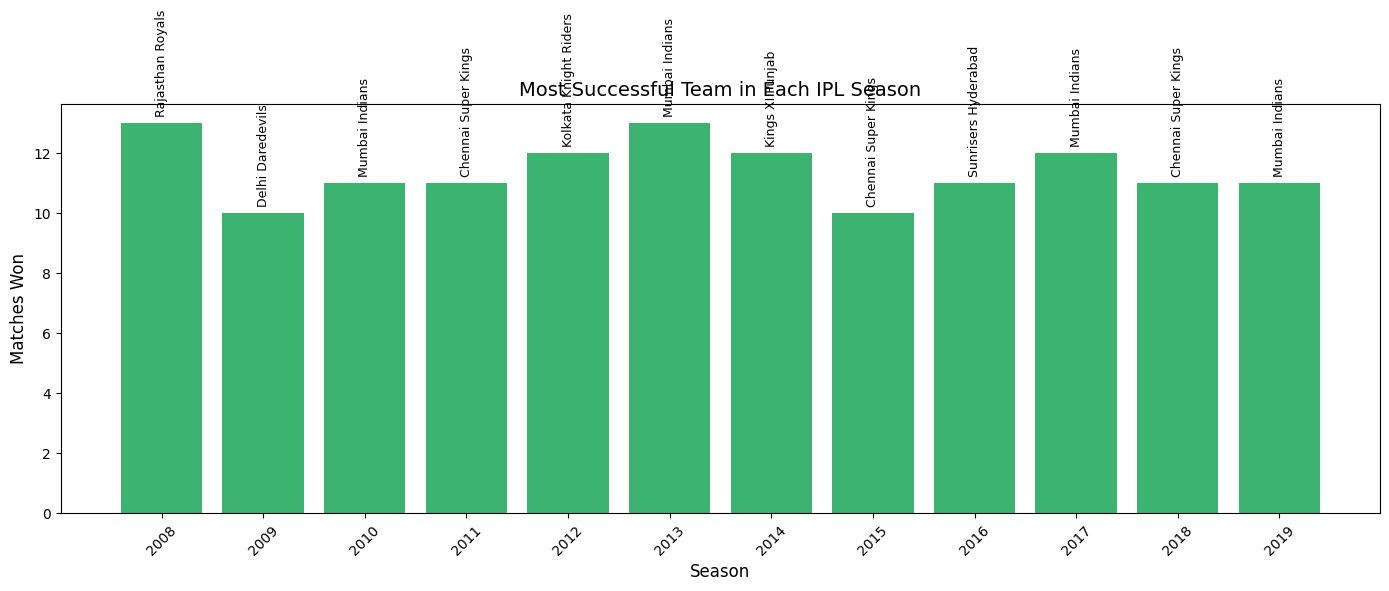

In [ ]:
top_teams['season'] = top_teams['season'].astype(str)
plt.figure(figsize=(14,6))
plt.bar(top_teams['season'], top_teams['wins'], color='mediumseagreen')
plt.title('Most Successful Team in Each IPL Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Matches Won', fontsize=12)
plt.xticks(rotation=45)
for index, row in top_teams.iterrows():
  plt.text(row['season'], row['wins'] + 0.3, row['winner'], ha='center', fontsize=9, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Count Player of the Match awards
top_players = df['player_of_match'].value_counts().head(10)

In [ ]:
# Display top 10 players
print(top_players)

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
RG Sharma         17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64


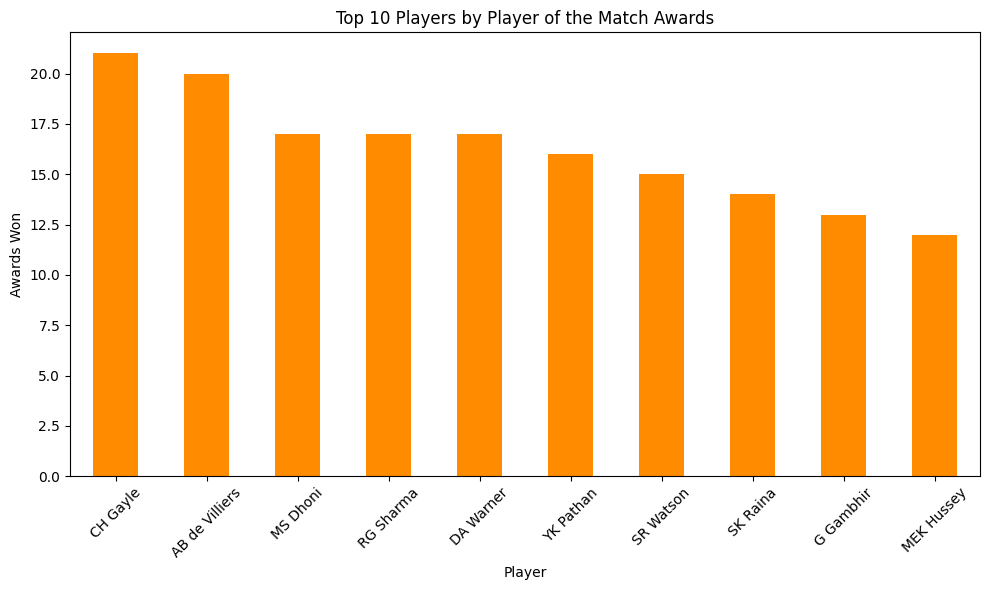

In [ ]:
plt.figure(figsize=(10,6))
top_players.plot(kind='bar', color='darkorange')
plt.title('Top 10 Players by Player of the Match Awards')
plt.xlabel('Player')
plt.ylabel('Awards Won')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#count of wins per team
# Drop null winners (no result)
matches_won = matches.dropna(subset=['winner'])

In [ ]:
# Count number of wins per team
wins_per_team = matches_won['winner'].value_counts()

In [ ]:
# Display the result
print(wins_per_team)

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


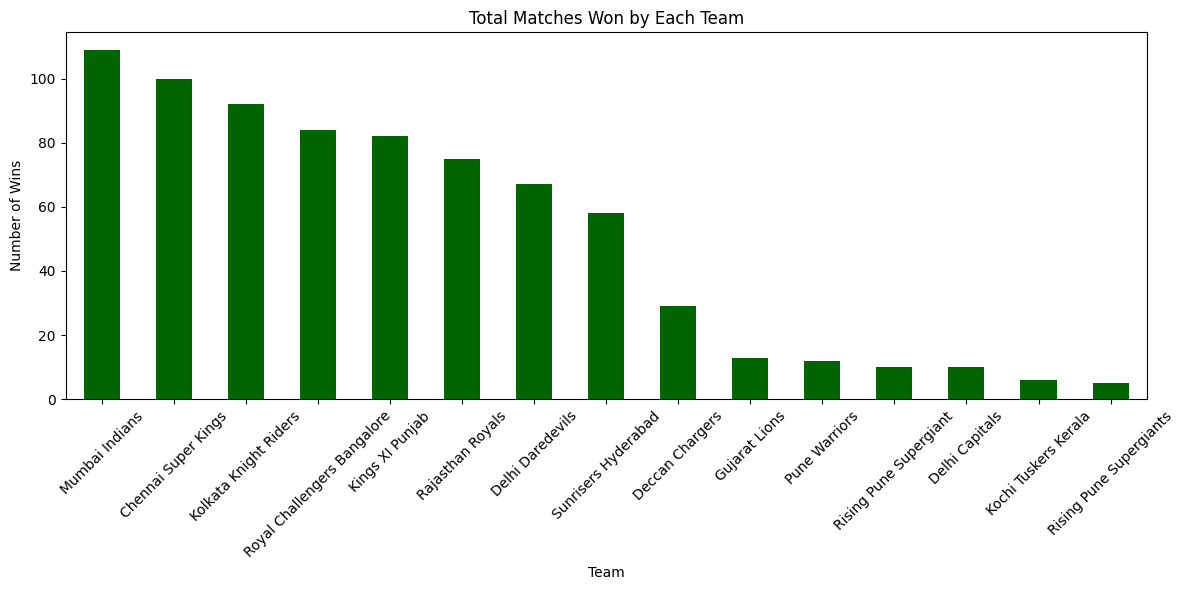

In [ ]:
#Plot the result
plt.figure(figsize=(12, 6))
wins_per_team.plot(kind='bar', color='darkgreen')
plt.title('Total Matches Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Number of Matches Won by Each Team Per Season
# Drop rows with no result
matches = matches.dropna(subset=['winner'])

In [ ]:
# Group by season and winner, count number of matches won
wins_per_season = matches.groupby(['season', 'winner']).size().unstack(fill_value=0)

In [ ]:
# Display the result
print(wins_per_season)

winner  Chennai Super Kings  Deccan Chargers  Delhi Capitals  \
season                                                         
2008                      9                2               0   
2009                      8                9               0   
2010                      9                8               0   
2011                     11                6               0   
2012                     10                4               0   
2013                     12                0               0   
2014                     10                0               0   
2015                     10                0               0   
2016                      0                0               0   
2017                      0                0               0   
2018                     11                0               0   
2019                     10                0              10   

winner  Delhi Daredevils  Gujarat Lions  Kings XI Punjab  \
season                                     

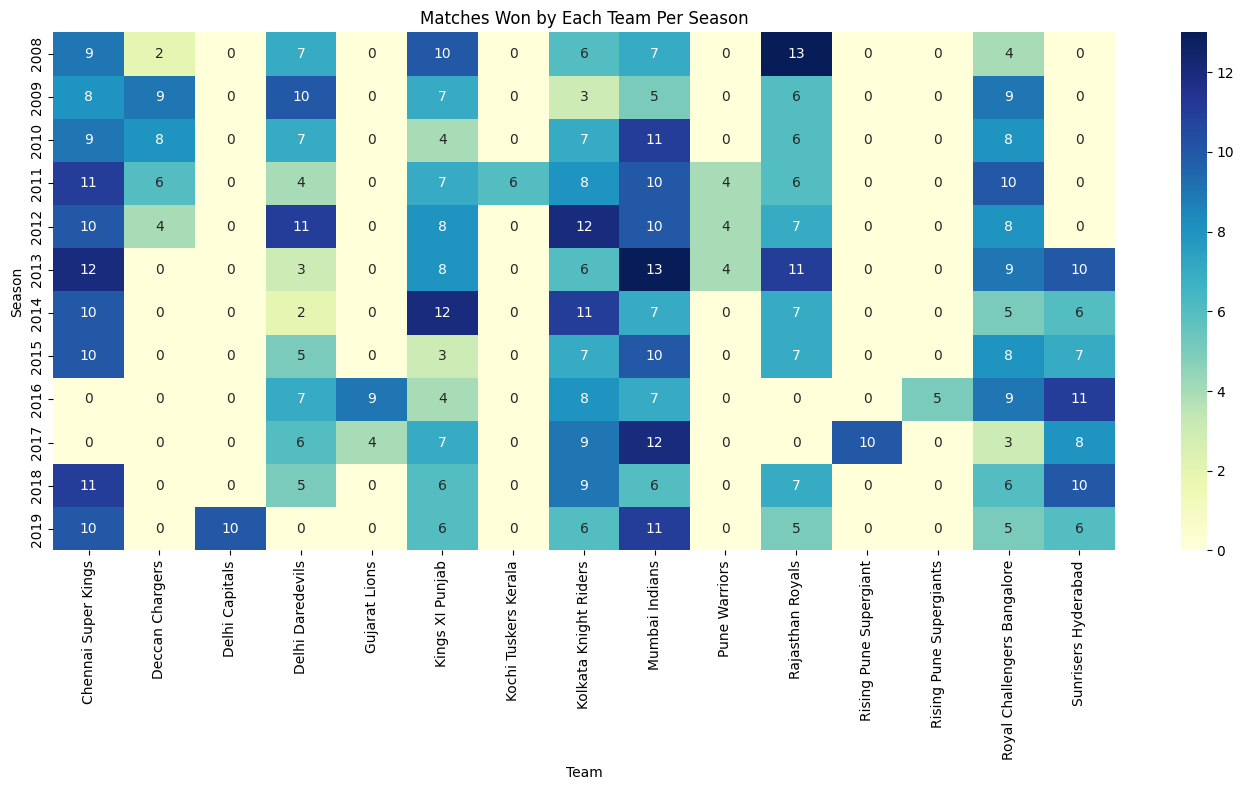

In [ ]:
#Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(wins_per_season, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Matches Won by Each Team Per Season')
plt.xlabel('Team')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

In [ ]:
#Toss Impact Analysis
# Drop rows where either toss_winner or winner is null
matches_clean = matches.dropna(subset=['toss_winner', 'winner'])

In [ ]:
# Count total matches where toss winner also won the match
toss_and_match_winner = matches_clean[matches_clean['toss_winner'] == matches_clean['winner']]
toss_win_match_win_count = toss_and_match_winner.shape[0]

In [ ]:
# Total matches played
total_matches = matches_clean.shape[0]

In [ ]:
# Calculate percentage
percentage = (toss_win_match_win_count / total_matches) * 100


In [ ]:
# Print results
print(f"Total Matches: {total_matches}")
print(f"Toss Winner also Match Winner: {toss_win_match_win_count}")
print(f"Percentage: {percentage:.2f}%")

Total Matches: 752
Toss Winner also Match Winner: 393
Percentage: 52.26%


In [ ]:
#Count number of matches played at each venue.
# Count matches per venue
venue_counts = matches['venue'].value_counts().head(10)

In [ ]:
# Display top venues
print(venue_counts)

venue
Eden Gardens                                  77
Wankhede Stadium                              73
M Chinnaswamy Stadium                         71
Feroz Shah Kotla                              66
Rajiv Gandhi International Stadium, Uppal     56
MA Chidambaram Stadium, Chepauk               49
Sawai Mansingh Stadium                        47
Punjab Cricket Association Stadium, Mohali    35
Maharashtra Cricket Association Stadium       21
Subrata Roy Sahara Stadium                    17
Name: count, dtype: int64


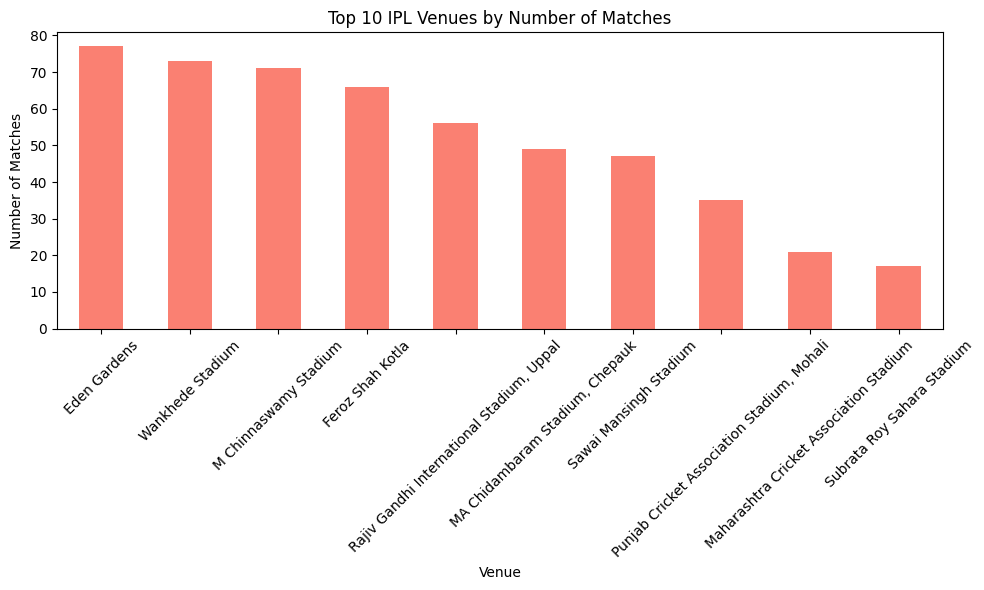

In [ ]:
# Plot the top 10 venues
plt.figure(figsize=(10, 6))
venue_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 IPL Venues by Number of Matches')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Find how many times each pair of teams played against each other and how many times each won.
# Create a consistent pair format
matches['team1'], matches['team2'] = matches[['team1', 'team2']].min(axis=1), matches[['team1', 'team2']].max(axis=1)
matches['team_pair'] = matches['team1'] + " vs " + matches['team2']

In [ ]:
# Group by team pair and winner, then count
head_to_head = matches.groupby(['team_pair', 'winner']).size().unstack(fill_value=0)

In [ ]:
# Display top 10 team pair rivalries
print(head_to_head.head(10))

winner                                              Chennai Super Kings  \
team_pair                                                                 
Chennai Super Kings vs Deccan Chargers                                6   
Chennai Super Kings vs Delhi Capitals                                 3   
Chennai Super Kings vs Delhi Daredevils                              12   
Chennai Super Kings vs Kings XI Punjab                               12   
Chennai Super Kings vs Kochi Tuskers Kerala                           1   
Chennai Super Kings vs Kolkata Knight Riders                         13   
Chennai Super Kings vs Mumbai Indians                                11   
Chennai Super Kings vs Pune Warriors                                  4   
Chennai Super Kings vs Rajasthan Royals                              14   
Chennai Super Kings vs Royal Challengers Bangalore                   15   

winner                                              Deccan Chargers  \
team_pair                   

In [ ]:
#Toss Decision Analysis – Bat vs Field
# Count toss decisions
toss_decision_counts = matches['toss_decision'].value_counts()

In [ ]:
# Display result
print(toss_decision_counts)

toss_decision
field    460
bat      292
Name: count, dtype: int64


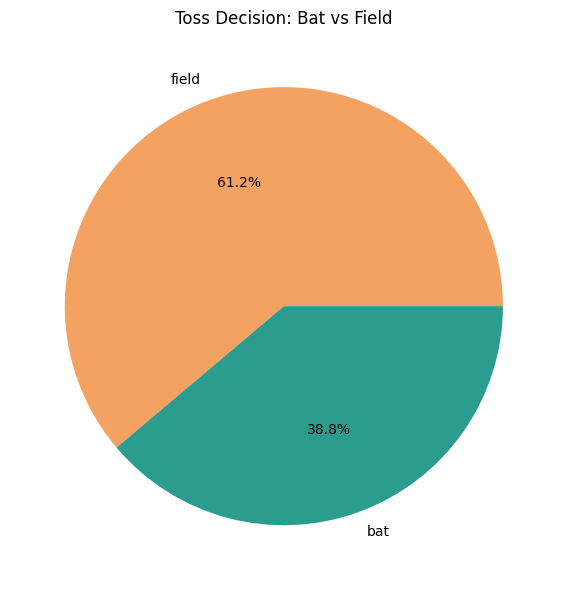

In [ ]:
#Plot pie chart
plt.figure(figsize=(6, 6))
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#f4a261', '#2a9d8f'])
plt.title('Toss Decision: Bat vs Field')
plt.ylabel('')
plt.tight_layout()
plt.show()